In [48]:
import numpy as np
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
model = read_sbml_model('iCW773_test7_psilocybin.xml')

No objective coefficients in model. Unclear what should be optimized


In [3]:
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.428929662134894

In [4]:
fseof = FSEOF(model)

In [5]:
model.reactions.query('psi','id')

[<Reaction psiH at 0x19c643cdd68>,
 <Reaction psiK at 0x19c643cdc88>,
 <Reaction psiK2 at 0x19c643cda90>,
 <Reaction psiM at 0x19c643cdba8>,
 <Reaction psiM2 at 0x19c643db630>,
 <Reaction DM_psi_c at 0x19c643db9e8>,
 <Reaction DM_psii_c at 0x19c643dbb00>]

In [6]:
f_result = fseof.run(target=model.reactions.DM_psi_c)
FRDT = f_result.data_frame

In [7]:
from matplotlib import pyplot as plt

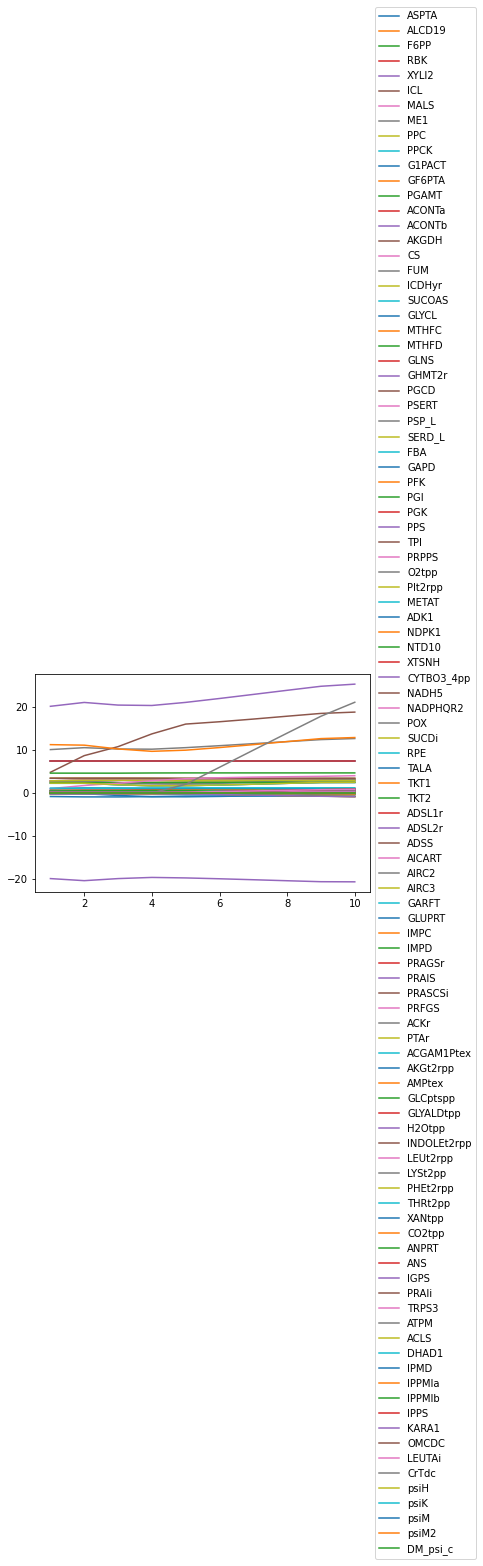

In [8]:
FRDT.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [43]:
#Sorting
FRDT2 = FRDT.sort_values(by=[1], ascending = False)
#Removing 0s
R0_FRDT2 = (FRDT2 != 0.0).all(axis=1)
FRDT3 = FRDT2.loc[R0_FRDT2]

Text(0.5, 1.0, 'Flux Scanning Based on Enforced Objective Flux')

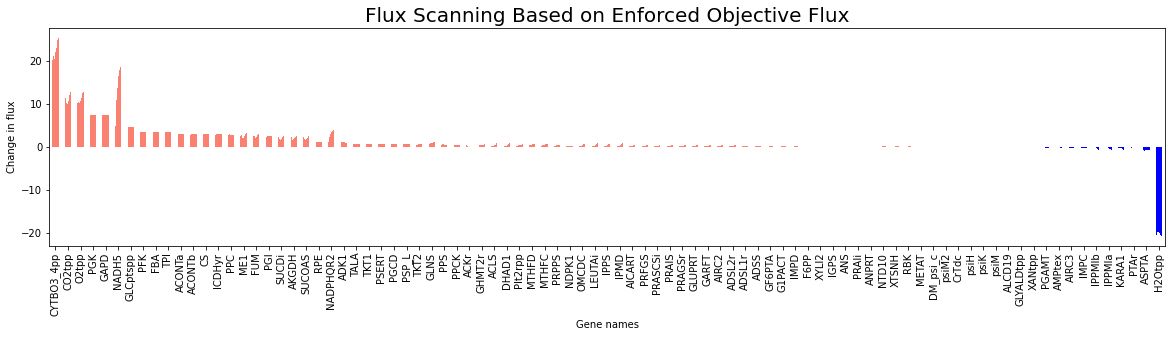

In [51]:
def bar_color(FRDT3, color1, color2):
    return np.where(FRDT3.values >=0, color1, color2).T

fig = FRDT3.plot(legend = None, kind= 'bar', color= bar_color(FRDT3, 'salmon','blue'), figsize= (20,4), grid= False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux Scanning Based on Enforced Objective Flux', size = 20)

In [52]:
FRDT3['RCiF'] = (FRDT3[10]-FRDT3[1])/FRDT3[10]+1

C:\Users\fjarios\Anaconda3\envs\carveme_ex5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
target_reactions = FRDT3[FRDT3['RCiF'] > 1.8]

In [66]:
target_reactions

,1,2,3,4,5,6,7,8,9,10,RCiF
OMCDC,0.150442,0.135543,0.120644,0.105745,0.173212,0.315225,0.461563,0.607902,0.752166,0.846858,1.822353
LEUTAi,0.150442,0.135543,0.120644,0.105745,0.173212,0.315225,0.461563,0.607902,0.752166,0.846858,1.822353
IPPS,0.150442,0.135543,0.120644,0.105745,0.173212,0.315225,0.461563,0.607902,0.752166,0.846858,1.822353
IPMD,0.150442,0.135543,0.120644,0.105745,0.173212,0.315225,0.461563,0.607902,0.752166,0.846858,1.822353
NTD10,0.006679,0.046350,0.012617,0.055835,0.162429,0.153510,0.135940,0.118369,0.100798,0.083228,1.919751
XTSNH,0.006679,0.046350,0.012617,0.055835,0.162429,0.153510,0.135940,0.118369,0.100798,0.083228,1.919751
RBK,0.006679,0.046350,0.012617,0.055835,0.162429,0.153510,0.135940,0.118369,0.100798,0.083228,1.919751
DM_psi_c,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.900000
psiM2,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961
CrTdc,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961


In [67]:
TR = target_reactions.drop(labels='RCiF', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

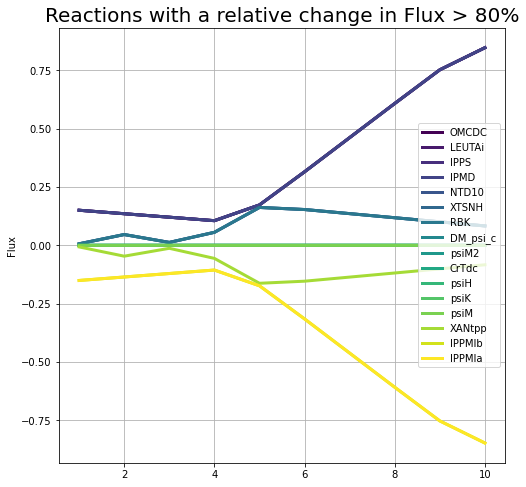

In [68]:
fig2 = TR.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.set_ylabel('Flux')
fig2.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [70]:
model.reactions.LEUTAi

Reaction identifier,LEUTAi
Name,leucine transaminase (irreversible)
Memory address,0x019c643cdf28
Stoichiometry,4mop_c + glu_L_c --> akg_c + leu_L_c 4_MethyL_2-oxopentanoate + L_Glutamate --> 2-Oxoglutarate + L_Leucine
GPR,cg2418
Lower bound,0.0
Upper bound,1.84535866666667
